In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = os.getcwd() + '\..\data\ex2data1.txt'

In [5]:
data = pd.read_csv(path , header = None, names = ['Exam 1','Exam 2','Admitted'])

In [7]:
print(data.head())

      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


In [8]:
admitted = data[data['Admitted'].isin([1])]
notadmitted = data[data['Admitted'].isin([0])]

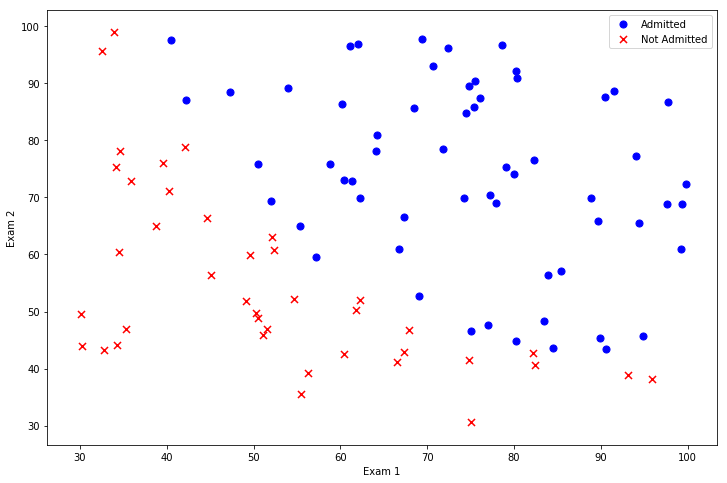

In [9]:
fig , ax = plt.subplots(figsize=(12,8))
ax.scatter(admitted['Exam 1'], admitted['Exam 2'], s=50, c='b', marker='o', label='Admitted')  
ax.scatter(notadmitted['Exam 1'], notadmitted['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1')
ax.set_ylabel('Exam 2')

In [14]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

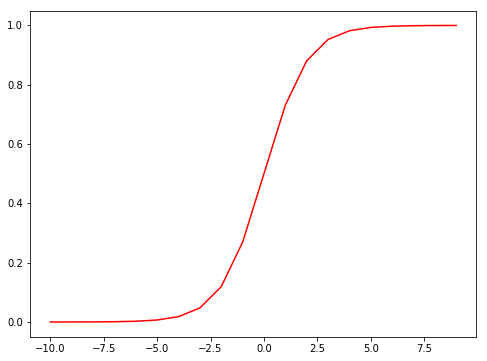

In [15]:
testsigmoidnums = np.arange(-10 , 10, step =1)
fig , ax = plt.subplots(figsize=(8,6))
ax.plot(testsigmoidnums, sigmoid(testsigmoidnums), 'r')

In [16]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    costwhenyis1 = np.multiply(-y , np.log(sigmoid(X * theta.T)))
    # -(1 - y) == y - 1
    costwhenyis0 = np.multiply((y-1),np.log(1 - sigmoid(X * theta.T)) )
    return np.sum( costwhenyis1 +  costwhenyis0 ) / len(X)

In [20]:
data.insert(0,'Ones' , 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:]
theta = np.zeros(3)
X = np.array(X.values)
y = np.array(y.values)

In [18]:
print(cost(theta, X, y))

0.69314718056


In [21]:
def getgradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters  = int(theta.ravel().shape[1])
    gradientarr = np.zeros(parameters)
    z = np.matrix(X) * np.matrix(theta).T
    error = sigmoid(z) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        gradientarr[i] = np.sum(term) /len(X)
        
    return gradientarr   
getgradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [22]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=getgradient, args=(X, y))

In [23]:
print(result)

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)


In [24]:
cost(result[0], X, y)

0.20349770158947425

<br/>Now we will check the accuracy

In [33]:
def predict(X, theta):
    z =  X * theta.T
    probablity = sigmoid(z)
    k = [1 if i >= 0.5 else 0 for i in probablity]
    return k
#return [1 if ((a==1 and b==1) or (a==0 or b ==0)) else 0  for (a,b) in zip(z , y)]

In [35]:
optimized_theta = np.matrix(result[0])
predictions = predict(X , optimized_theta)
correct = [1 if ((a==0 and b==0) or (a==1 and b==1)) else 0 for (a,b) in zip(y,predictions)]
accuracy = sum(map(int,correct )) % len(correct)
print('Accuracy : {0}%'.format(accuracy))

Accuracy : 89%


Not Bad aah ...